In [1]:
# Initial imports
import requests
import pandas as pd
from pathlib import Path
import os

path = os.getcwd()

print(path)

C:\workspace\project\Project-1


In [2]:
# set path
gold_csv_path = Path("Resources/gold_price.csv")
wages_csv_path = Path("Resources/annual_yearly_wages_20_years.csv")


In [3]:
gold_price_df = pd.read_csv(gold_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
annual_wages_df = pd.read_csv(wages_csv_path, index_col="TIME", parse_dates=True, infer_datetime_format=True)


In [4]:
gold_price_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2019-12-19,"1,479.15","1,475.44","1,481.97","1,473.01",0.25%
2019-12-18,"1,475.44","1,476.45","1,479.67","1,470.32",-0.07%
2019-12-17,"1,476.45","1,476.25","1,480.78","1,474.23",0.01%
2019-12-16,"1,476.25","1,475.60","1,480.03","1,472.99",0.03%
2019-12-13,"1,475.81","1,469.47","1,478.22","1,462.48",0.43%


In [5]:
annual_wages_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1999-01-01,AUS,AVWAGE,TOT,USD,A,46056.21709,NaN
2000-01-01,AUS,AVWAGE,TOT,USD,A,46156.00471,NaN
2001-01-01,AUS,AVWAGE,TOT,USD,A,46658.38049,NaN
2002-01-01,AUS,AVWAGE,TOT,USD,A,46979.50613,NaN
2003-01-01,AUS,AVWAGE,TOT,USD,A,47529.08855,NaN


In [6]:
annual_wages_df.drop(columns=['Flag Codes','SUBJECT','FREQUENCY','INDICATOR', 'MEASURE'],inplace=True)
annual_wages_df.head()

,LOCATION,Value
TIME,,
1999-01-01,AUS,46056.21709
2000-01-01,AUS,46156.00471
2001-01-01,AUS,46658.38049
2002-01-01,AUS,46979.50613
2003-01-01,AUS,47529.08855


In [7]:
annual_wages_df.rename(columns={"Value":"annual_wage", "LOCATION":"country", "TIME":"Date"},inplace=True)
annual_wages_df.head()

,country,annual_wage
TIME,,
1999-01-01,AUS,46056.21709
2000-01-01,AUS,46156.00471
2001-01-01,AUS,46658.38049
2002-01-01,AUS,46979.50613
2003-01-01,AUS,47529.08855


In [8]:
gold_price_df.drop(columns=['Open','High','Low','Change %'],inplace=True)
gold_price_df.head()

,Price
Date,
2019-12-19,"1,479.15"
2019-12-18,"1,475.44"
2019-12-17,"1,476.45"
2019-12-16,"1,476.25"
2019-12-13,"1,475.81"


In [9]:
gold_price_df['Price'] = gold_price_df['Price'].str.replace(',','')
#df[‘Close’] = _df[‘Close’].str.replace(‘,, ‘’)
gold_price_df['Price'] = gold_price_df['Price'].astype(float)
#gold_price_df['Price'] = pd.to_numeric(gold_price_df['Price'],errors='coerce')
#gold_price_df['Price'] = (gold_price_df['Price'])
gold_price_df.dtypes

Price    float64
dtype: object

In [10]:
gold_price_df.head()

,Price
Date,
2019-12-19,1479.15
2019-12-18,1475.44
2019-12-17,1476.45
2019-12-16,1476.25
2019-12-13,1475.81



Bad key "text.kerning_factor" on line 4 in
C:\Users\haris\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


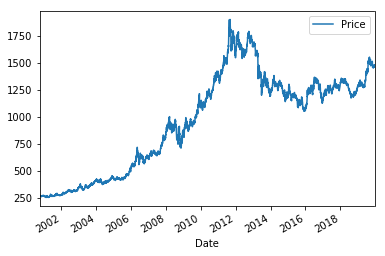

In [11]:
%matplotlib inline

gold_price_df.plot()

In [12]:
annual_wages_df.index = annual_wages_df.index.year
annual_wages_df.head()
annual_wages_df.groupby(['TIME','country']).max().head()

,country,annual_wage
TIME,,
1999,AUS,46056.21709
2000,AUS,46156.00471
2001,AUS,46658.38049
2002,AUS,46979.50613
2003,AUS,47529.08855


In [17]:
pivot_df = annual_wages_df.pivot_table(values = 'annual_wage', index=['TIME'], columns=['country'])
pivot_df.head()

country,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,OECD,POL,PRT,SVK,SVN,SWE,USA
TIME,,,,,,,,,,,,,,,,,,,,,
1999,46056.21709,48169.25513,51546.10314,42877.79254,57506.51012,17975.05937,16295.81187,45055.95807,45558.58899,38780.92795,...,50199.47754,37292.68382,32717.31136,40897.16521,20781.54631,27143.42048,14817.17188,27728.05225,33429.20117,52848.89044
2000,46156.00471,48301.77172,51082.82873,44177.81325,57849.93181,17945.35541,16836.35095,45309.74183,45532.48395,37933.31735,...,51451.00556,37616.38812,32873.21857,41766.08881,20903.45334,27514.63243,15378.29333,28428.57293,34485.65431,54641.50930
2001,46658.38049,48178.32743,51241.62980,43996.98695,60006.65200,18437.02921,17682.55417,45655.08020,45837.00049,37735.25209,...,52213.46174,38542.37008,33478.36732,42190.29334,22141.83061,27626.23531,15377.68270,29585.65631,34883.85589,55103.64980
2002,46979.50613,48888.55160,52823.82568,43630.12866,60939.25781,18597.52173,18752.99864,45929.54614,46890.28766,37923.89394,...,52390.26181,40140.26416,34112.58897,42363.03600,22075.51096,27612.59548,16171.46851,29671.11328,35338.88404,55537.49696
2003,47529.08855,49031.32592,53134.35824,43646.42193,60787.38637,18999.73228,20169.95749,46082.95538,48058.11301,37732.97884,...,52761.49574,40678.93459,35358.68885,42771.11076,22346.52368,27549.69606,16483.93807,30293.46986,35640.42420,56218.66004


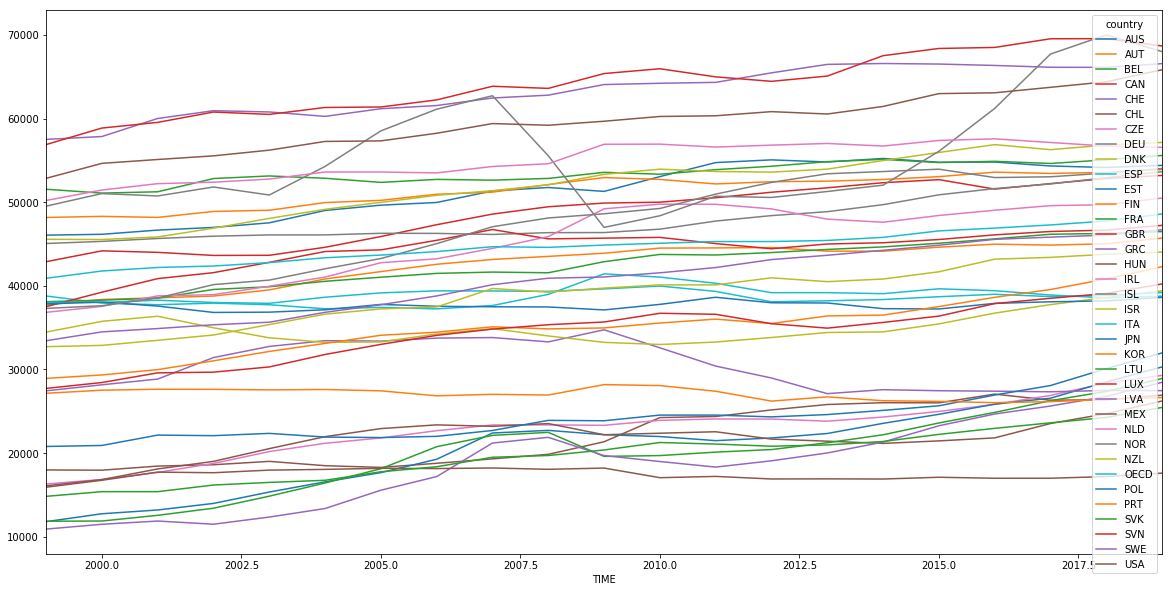

In [20]:
pivot_df.plot(figsize=[20,10])

In [22]:
annual_wages_df['hourly_wage'] = annual_wages_df['annual_wage'] / (52 * 40)
annual_wages_df.head()

,country,annual_wage,hourly_wage
TIME,,,
1999,AUS,46056.21709,22.142412
2000,AUS,46156.00471,22.190387
2001,AUS,46658.38049,22.431914
2002,AUS,46979.50613,22.586301
2003,AUS,47529.08855,22.850523


In [23]:
pivot_hourly_df = annual_wages_df.pivot_table(values = 'hourly_wage', index=['TIME'], columns=['country'])
pivot_hourly_df.head()

country,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,OECD,POL,PRT,SVK,SVN,SWE,USA
TIME,,,,,,,,,,,,,,,,,,,,,
1999,22.142412,23.158296,24.781780,20.614323,27.647361,8.641855,7.834525,21.661518,21.903168,18.644677,...,24.134364,17.929175,15.729477,19.662099,9.991128,13.049721,7.123640,13.330794,16.071731,25.408120
2000,22.190387,23.222006,24.559052,21.239333,27.812467,8.627575,8.094399,21.783530,21.890617,18.237172,...,24.736060,18.084802,15.804432,20.079850,10.049737,13.228189,7.393410,13.667583,16.579641,26.269956
2001,22.431914,23.162657,24.635399,21.152398,28.849352,8.863956,8.501228,21.949558,22.037019,18.141948,...,25.102626,18.529986,16.095369,20.283795,10.645111,13.281844,7.393117,14.223873,16.771085,26.492139
2002,22.586301,23.504111,25.396070,20.976023,29.297720,8.941116,9.015865,22.081513,22.543408,18.232641,...,25.187626,19.298204,16.400283,20.366844,10.613226,13.275286,7.774744,14.264958,16.989848,26.700720
2003,22.850523,23.572753,25.545365,20.983857,29.224705,9.134487,9.697095,22.155267,23.104862,18.140855,...,25.366104,19.557180,16.999370,20.563034,10.743521,13.245046,7.924970,14.564168,17.134819,27.028202


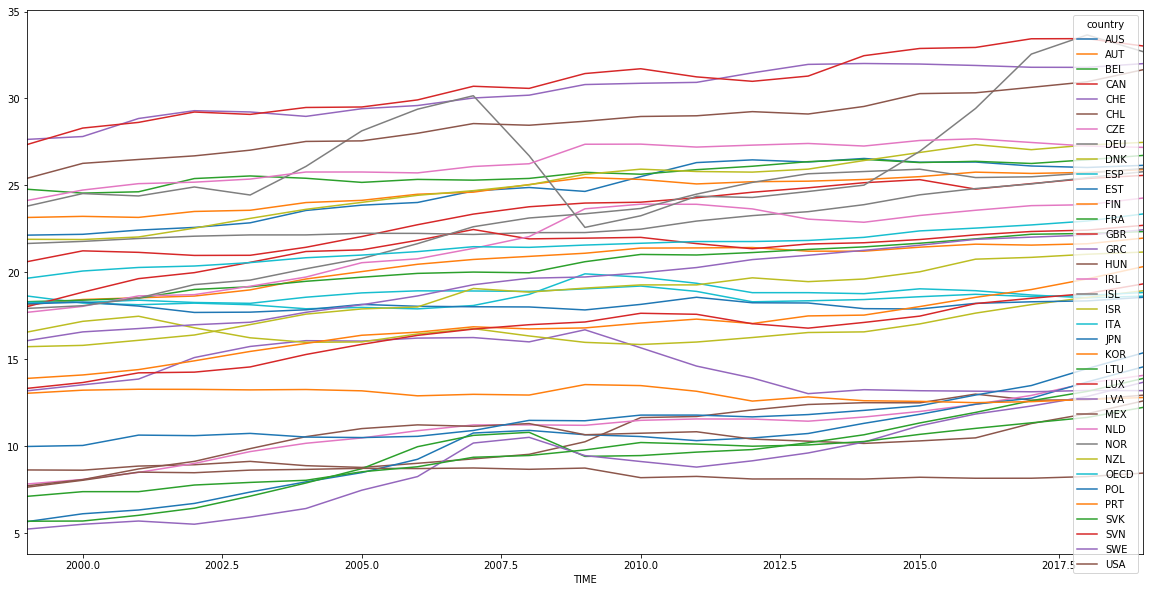

In [25]:
pivot_hourly_df.plot(figsize=[20,10])

In [26]:
gold_price_df.index = gold_price_df.index.year
gold_price_df.head()

,Price
Date,
2019,1479.15
2019,1475.44
2019,1476.45
2019,1476.25
2019,1475.81


In [27]:
avg_gold_price_df = gold_price_df.groupby('Date').mean()
avg_gold_price_df.head()

,Price
Date,
2000,269.283871
2001,271.370462
2002,310.700308
2003,364.215692
2004,409.897088


In [28]:
annual_wages_df.head()

,country,annual_wage,hourly_wage
TIME,,,
1999,AUS,46056.21709,22.142412
2000,AUS,46156.00471,22.190387
2001,AUS,46658.38049,22.431914
2002,AUS,46979.50613,22.586301
2003,AUS,47529.08855,22.850523


In [30]:
pd.concat([avg_gold_price_df,annual_wages_df], axis=0)

C:\Users\haris\Anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Price,annual_wage,country,hourly_wage
2000,269.283871,NaN,NaN,NaN
2001,271.370462,NaN,NaN,NaN
2002,310.700308,NaN,NaN,NaN
2003,364.215692,NaN,NaN,NaN
2004,409.897088,NaN,NaN,NaN
2005,445.391846,NaN,NaN,NaN
2006,605.034981,NaN,NaN,NaN
2007,697.399962,NaN,NaN,NaN
2008,872.205458,NaN,NaN,NaN
2009,974.066475,NaN,NaN,NaN
